In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.datasets import fetch_olivetti_faces

In [3]:
df=fetch_olivetti_faces()
print(df['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [5]:
data=df['data']
target=df['target']

In [6]:
print(data)

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


In [7]:
print(target)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test_val,y_train,y_test_val=train_test_split(data,target,test_size=0.2,stratify=target,random_state=42)

In [9]:

x_valid,x_test,y_valid,y_test=train_test_split(x_test_val,y_test_val,test_size=0.5,stratify=y_test_val,random_state=42)

In [10]:
from sklearn.cluster import KMeans

In [11]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(320, 4096)
(40, 4096)
(40, 4096)


In [12]:
from sklearn.random_projection import SparseRandomProjection

In [15]:
srp=SparseRandomProjection(eps=0.5,random_state=42)
x_train=srp.fit_transform(x_train)
print(srp.n_components)

auto


In [18]:
print(x_train.shape)

(320, 276)


In [19]:
x_valid=srp.transform(x_valid)
print(x_valid.shape)

(40, 276)


In [20]:
x_test=srp.transform(x_test)
print(x_test.shape)

(40, 276)


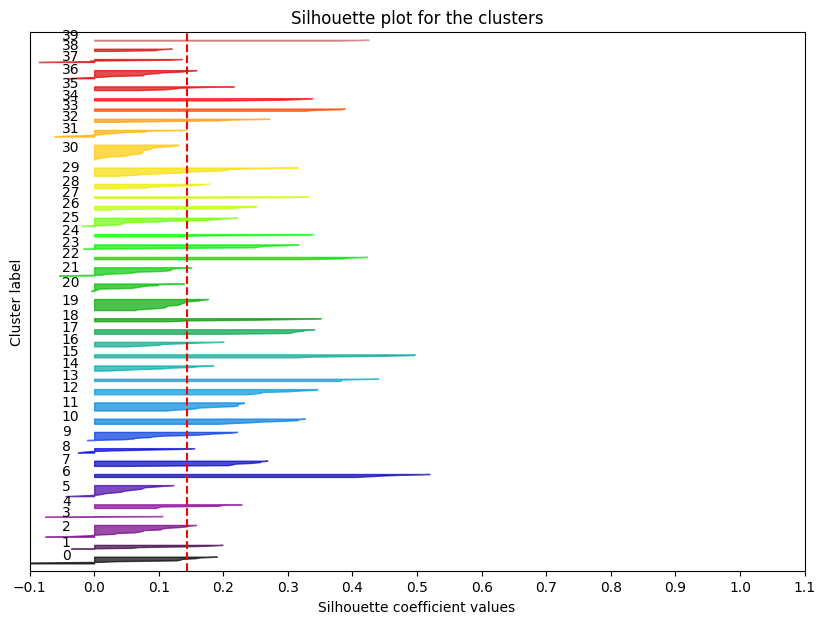

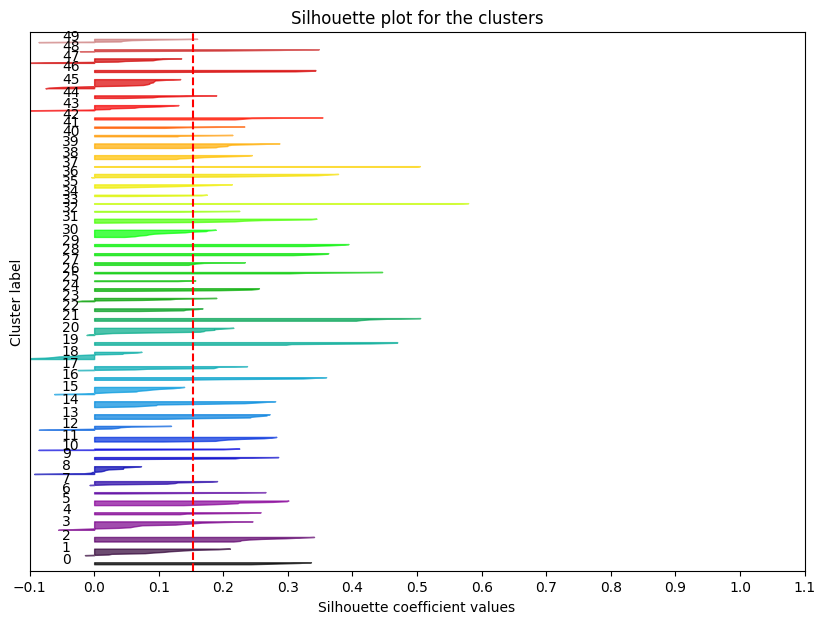

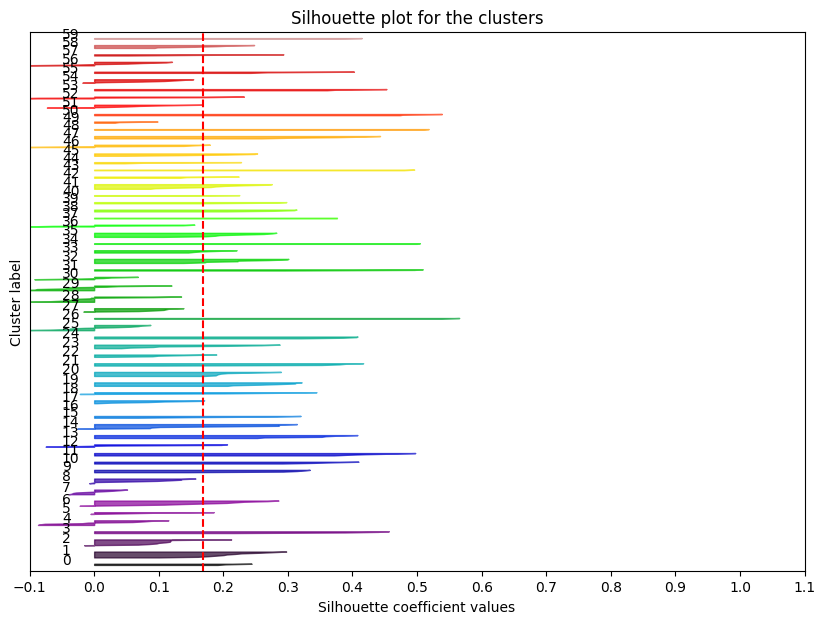

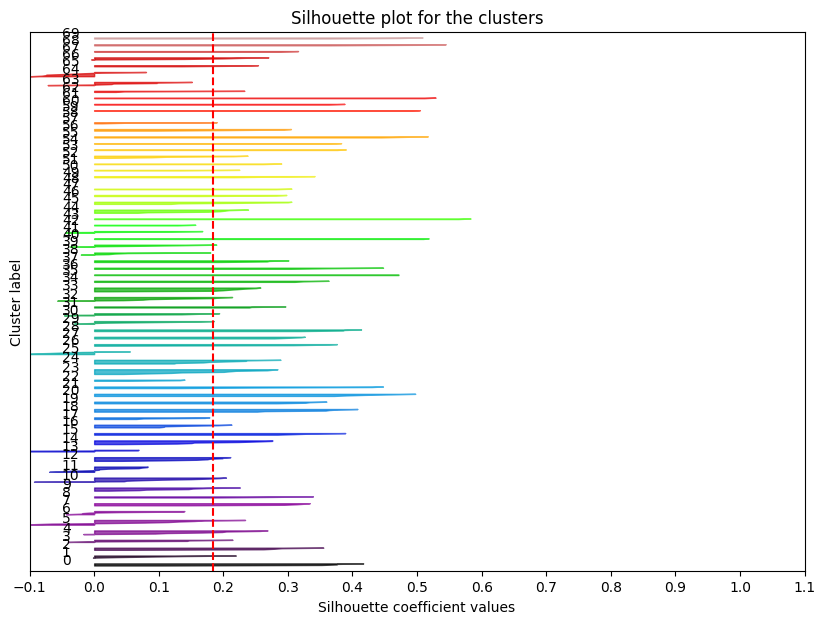

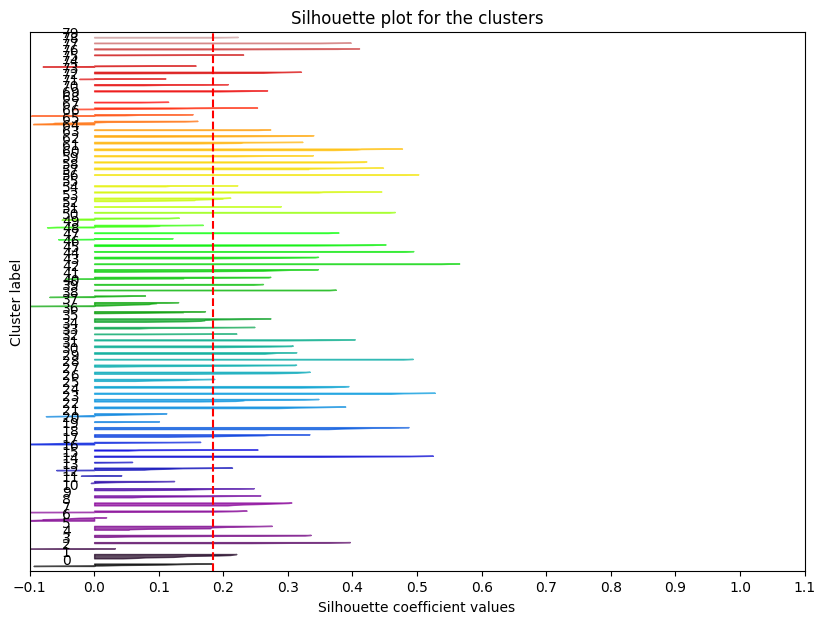

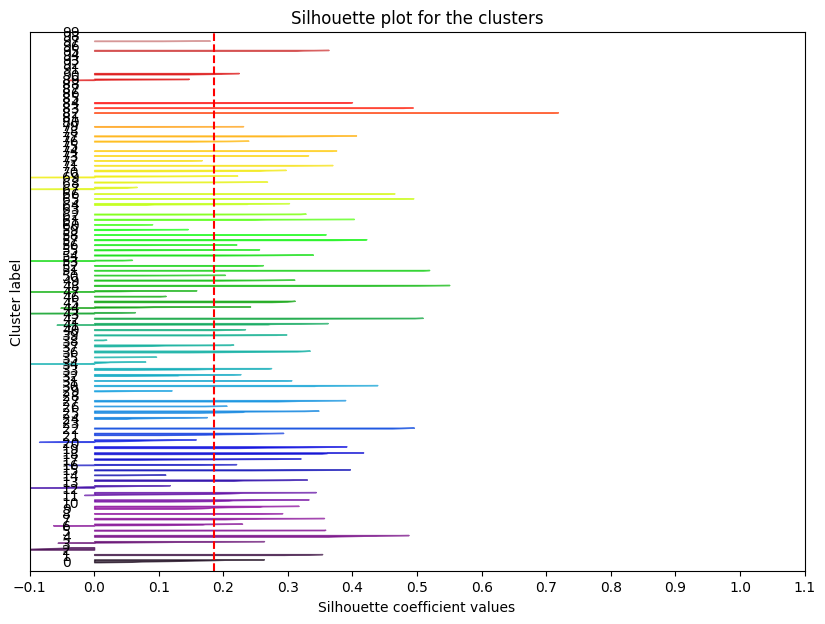

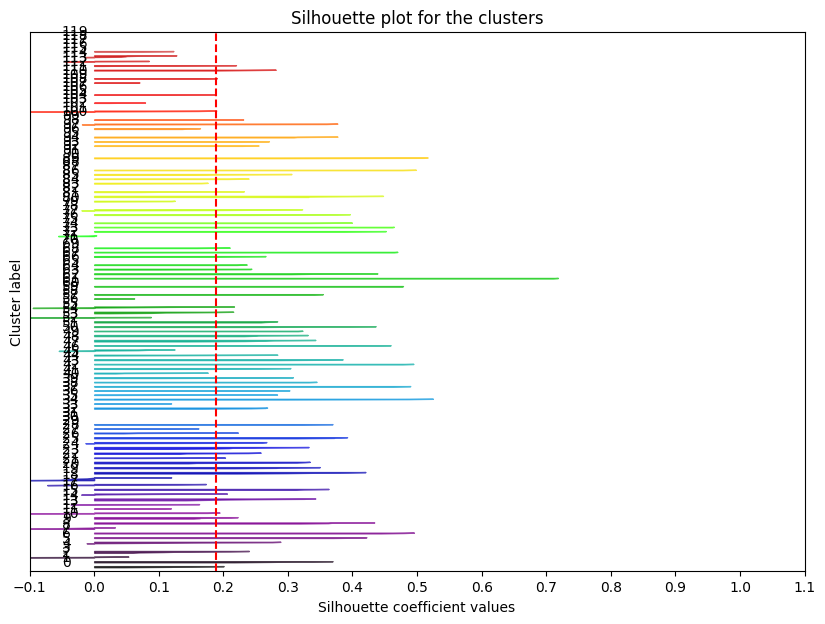

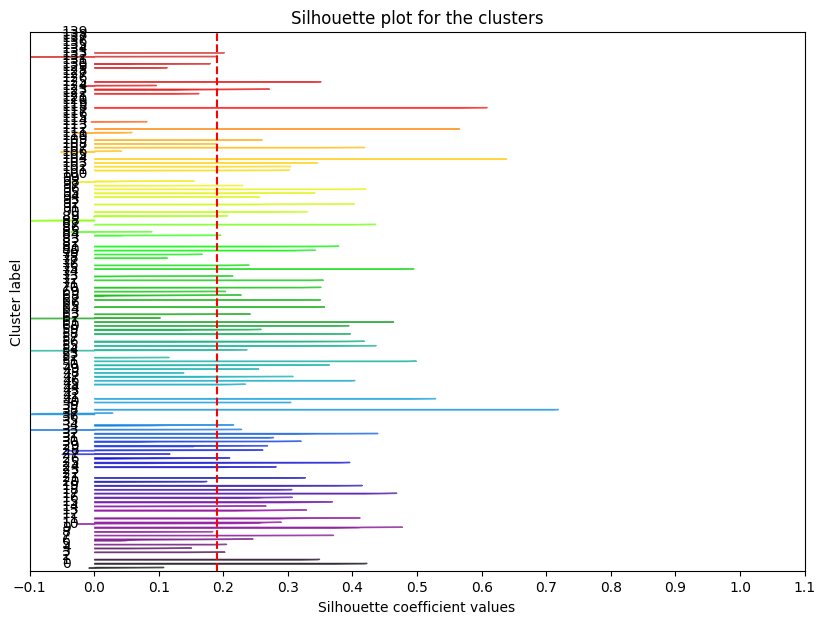

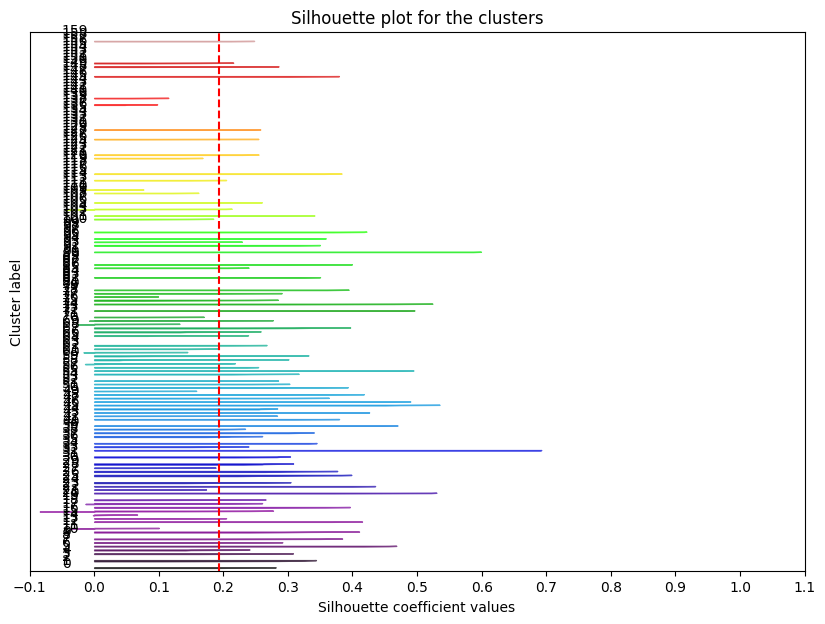

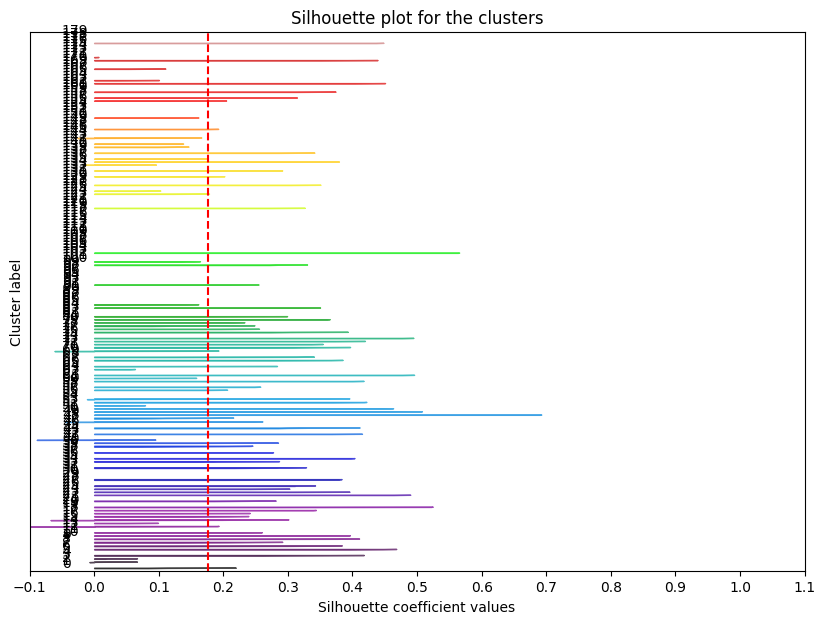

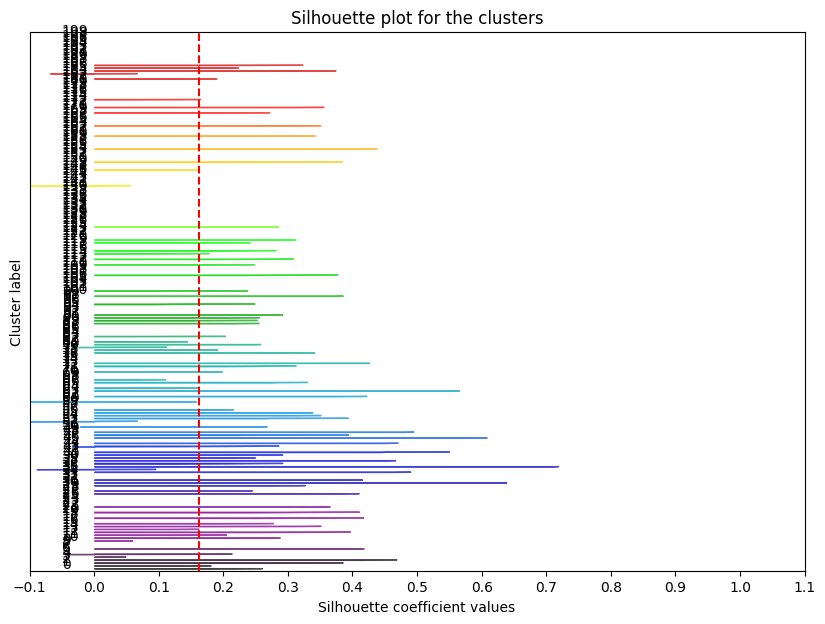

199
[0.1442242, 0.1533061, 0.16792285, 0.183442, 0.18343538, 0.18589287, 0.18875416, 0.19024085, 0.19310614, 0.1763386, 0.16175792]


In [48]:
from sklearn.metrics import silhouette_samples,silhouette_score
k_range=[40,50,60,70,80,100,120,140,160,180,200]
s=[]
i_arr=[]
for k in k_range:
    n_clusters=k
    km=KMeans(n_clusters=k,n_init=10,random_state=42)
    km.fit(x_train)
    i_arr.append(km.inertia_)
    s.append(silhouette_score(x_train,km.labels_))
    silhouette_avg = silhouette_score(x_train,km.labels_)
    sample_silhouette_values = silhouette_samples(x_train,km.labels_)

    # Plot the silhouette diagram
    fig, ax1 = pl.subplots(1, 1)
    fig.set_size_inches(10, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x_train) + (n_clusters + 1) * 10])

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = pl.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))

    pl.show()
print(i)
print(s)

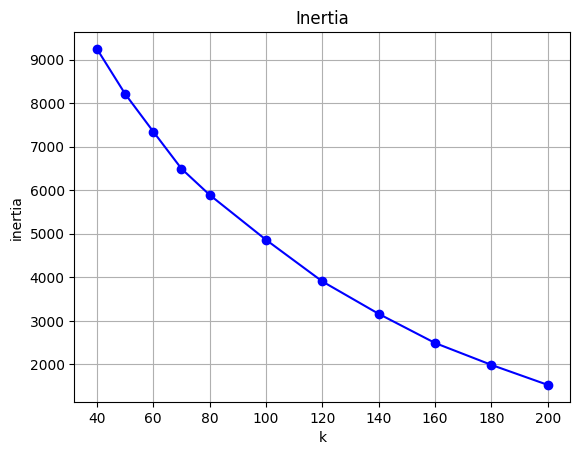

In [49]:
pl.plot(k_range,i_arr,"bo-")
pl.grid(True)
pl.title('Inertia')
pl.xlabel('k')
pl.ylabel('inertia')
pl.show()

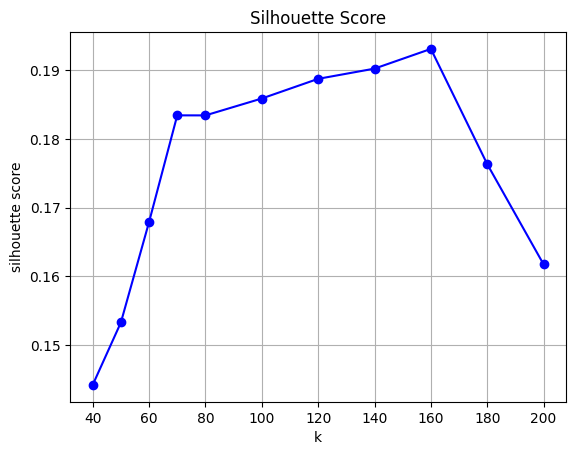

In [50]:
pl.plot(k_range,s,"bo-")
pl.grid(True)
pl.title('Silhouette Score')
pl.xlabel('k')
pl.ylabel('silhouette score')
pl.show()